In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Exercise 1: Basic Classification Methods
print("Exercise 1: Basic Classification Methods")
print("-" * 50)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", lr_model.score(X_test_scaled, y_test))

Exercise 1: Basic Classification Methods
--------------------------------------------------
Logistic Regression Accuracy: 1.0



Exercise 2: Confusion Matrix and Classification Report
--------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



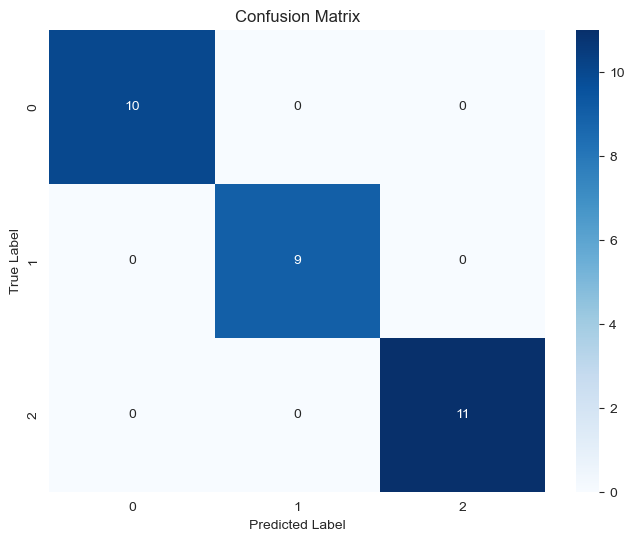

In [3]:
# Exercise 2: Confusion Matrix and Classification Report
print("\nExercise 2: Confusion Matrix and Classification Report")
print("-" * 50)

# Generate confusion matrix
cm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Exercise 3: K-Means Clustering
--------------------------------------------------


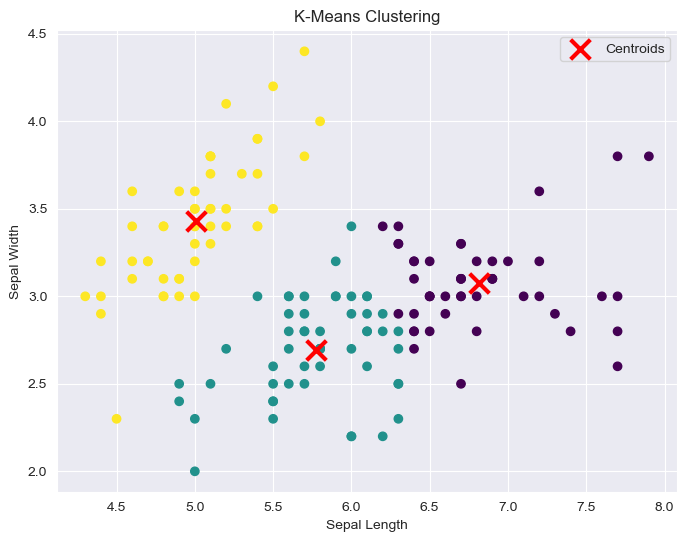

In [4]:
# Exercise 3: K-Means Clustering
print("\nExercise 3: K-Means Clustering")
print("-" * 50)

# Use only two features for visualization
X_cluster = X[:, [0, 1]]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Exercise 4: Evaluating K-Means Clustering
--------------------------------------------------


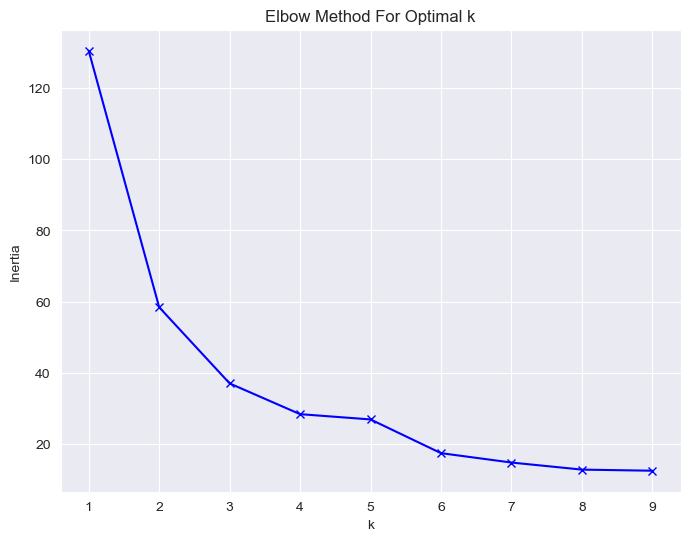

In [5]:
# Exercise 4: Evaluating K-Means Clustering
print("\nExercise 4: Evaluating K-Means Clustering")
print("-" * 50)

# Calculate inertia for different k values
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()



Exercise 5: Hierarchical Clustering
--------------------------------------------------


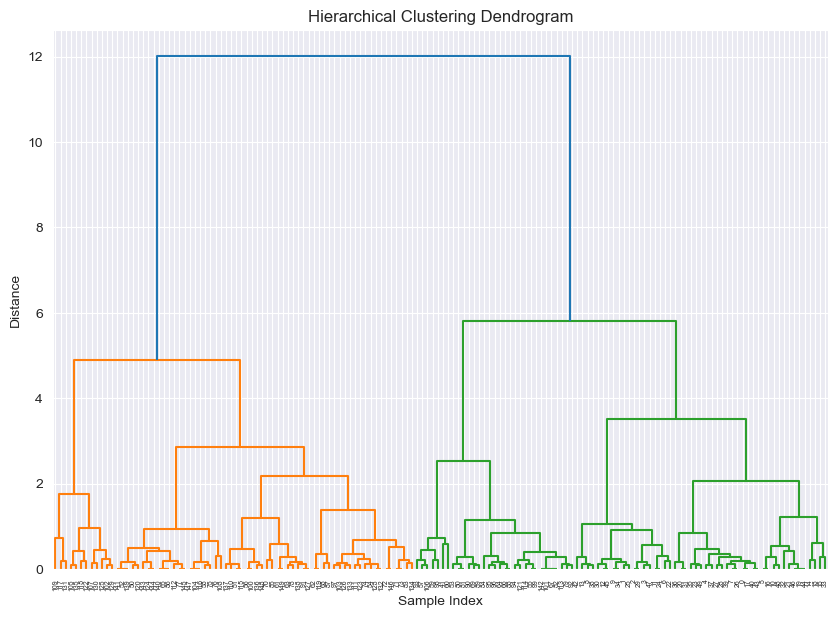

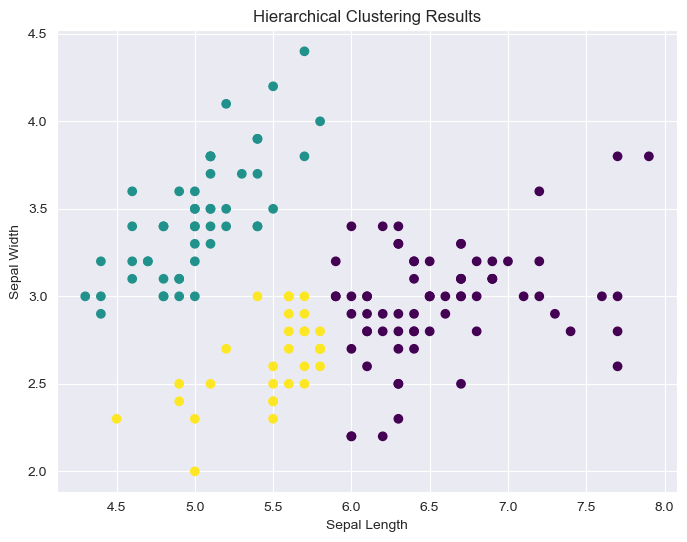

In [6]:
# Exercise 5: Hierarchical Clustering
print("\nExercise 5: Hierarchical Clustering")
print("-" * 50)

# Calculate linkage matrix
linkage_matrix = linkage(X_cluster, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



Exercise 6: DBSCAN
--------------------------------------------------


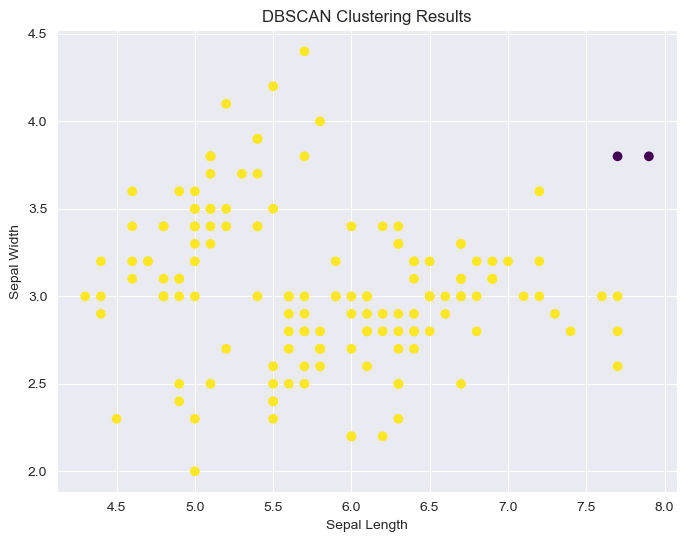


Number of clusters found by DBSCAN: 1
Silhouette score for K-Means: 0.4450525692083638
Silhouette score for Hierarchical: 0.4152328433642682
Silhouette score for DBSCAN: N/A


In [7]:
# Exercise 6: DBSCAN
print("\nExercise 6: DBSCAN")
print("-" * 50)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster)

# Visualize DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Compare clustering methods
print("\nNumber of clusters found by DBSCAN:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Silhouette score for K-Means:", silhouette_score(X_cluster, kmeans_labels))
print("Silhouette score for Hierarchical:", silhouette_score(X_cluster, agg_labels))
print("Silhouette score for DBSCAN:", silhouette_score(X_cluster, dbscan_labels) if -1 not in dbscan_labels else "N/A")